<a href="https://colab.research.google.com/github/karimqasim/MachineLearning/blob/master/BinaryClassification_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
!wget https://storage.googleapis.com/nicksdemobucket/titanic-train.csv

--2019-03-27 00:14:19--  https://storage.googleapis.com/nicksdemobucket/titanic-train.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [application/octet-stream]
Saving to: ‘titanic-train.csv.2’

titanic-train.csv.2 100%[===================>]  59.76K  --.-KB/s    in 0.001s  

2019-03-27 00:14:19 (83.9 MB/s) - ‘titanic-train.csv.2’ saved [61194/61194]



In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
train = pd.read_csv('titanic-train.csv')

In [138]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [139]:
train.shape

(891, 12)

In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
#we can see that there are missing/null values in Age, Cabin and Embarked columns. 

# Exploratory Analysis

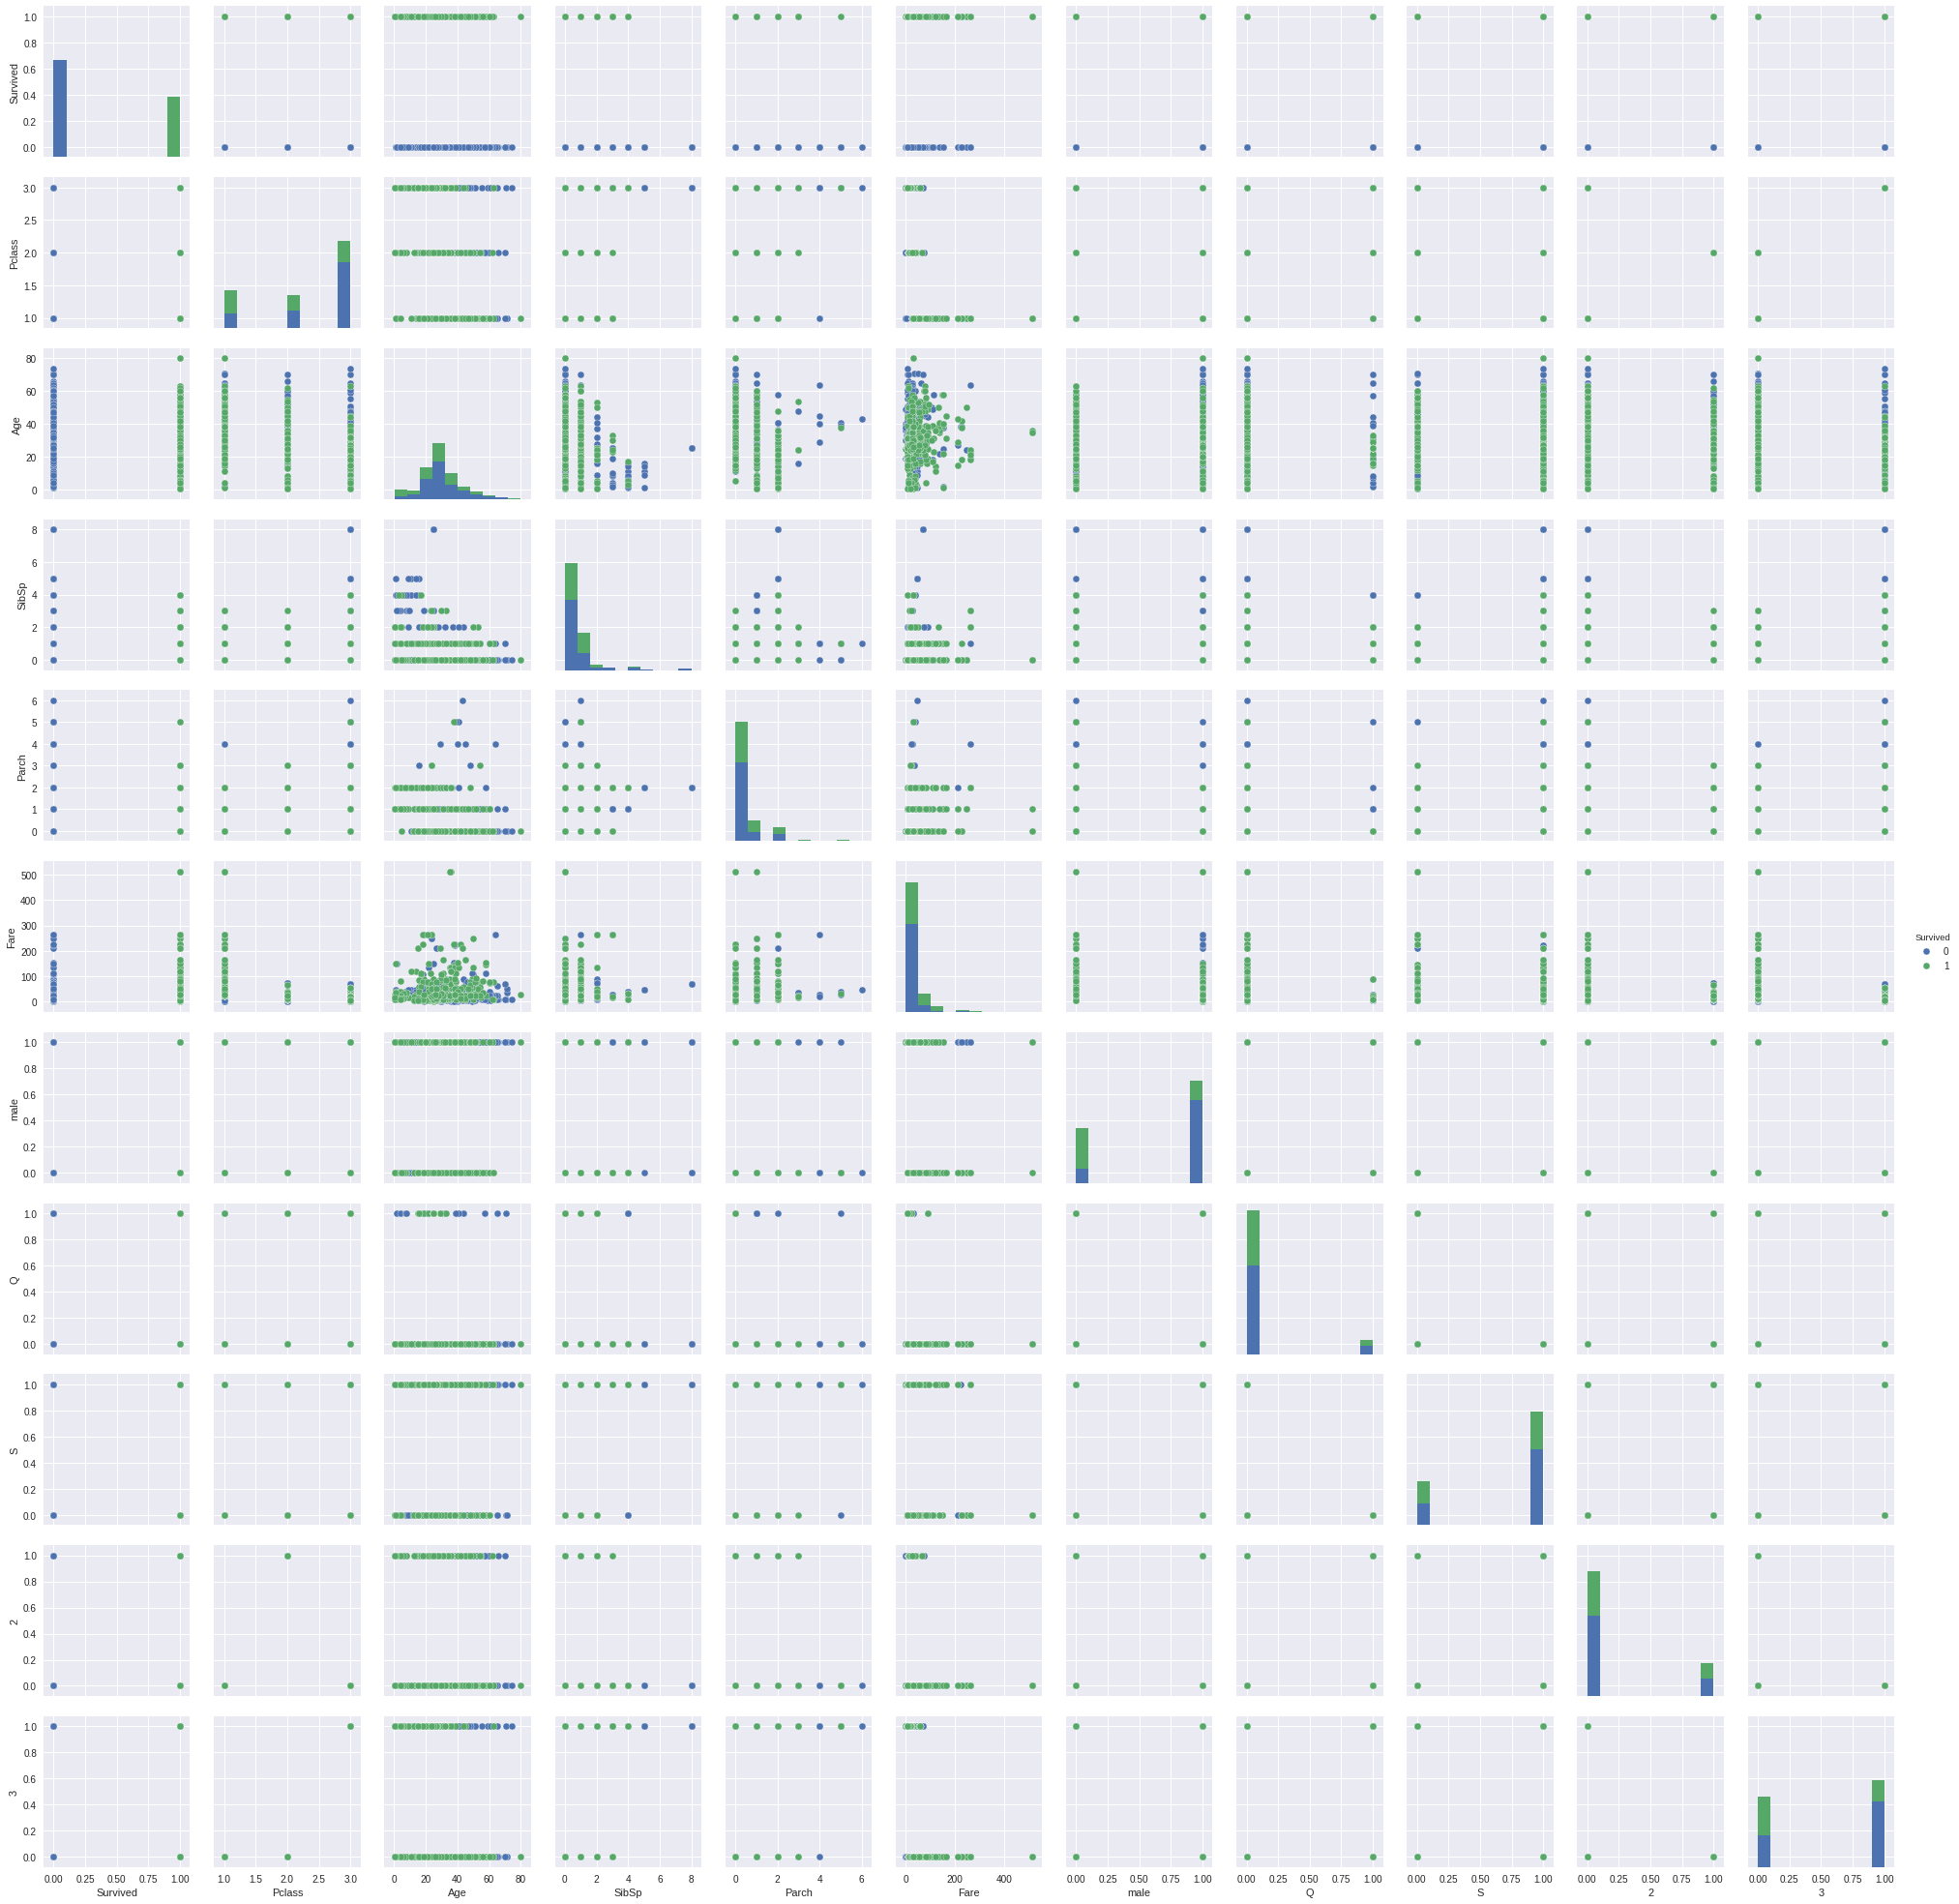

In [200]:
# To get the idea of correlation between feature and predicted variables
sns.pairplot(train, hue='Survived')

In [0]:
#Visualize using heatmap

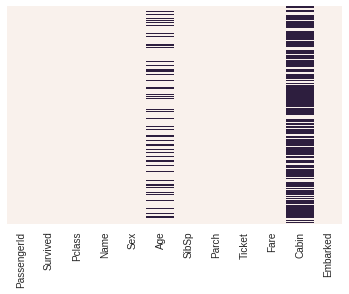

In [143]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False)

 Note: Every black line in the above figure represents a null value.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


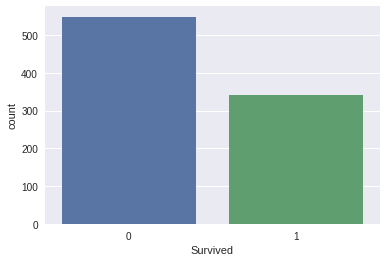

In [144]:
sns.countplot(x='Survived', data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


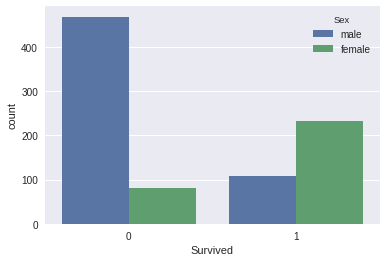

In [145]:
sns.countplot(x='Survived', hue='Sex', data=train)

Note: Males were more likely to not survive

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


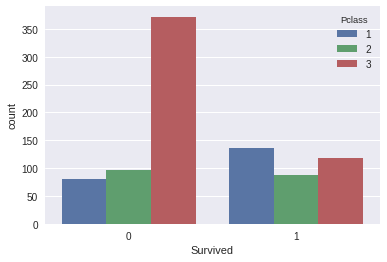

In [146]:
sns.countplot(x='Survived', hue='Pclass', data=train)

Note: More people in class 3 (lower class) did not survive

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


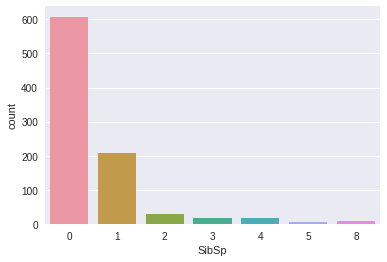

In [147]:
sns.countplot(x='SibSp', data=train)

Note: Most people on-board did not have either children or a spouse. 

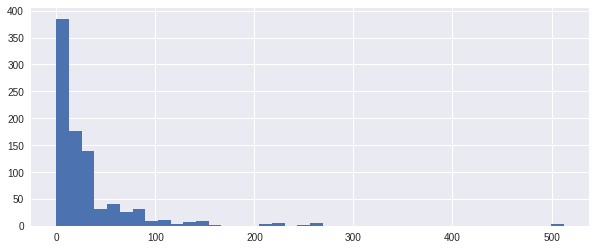

In [148]:
train['Fare'].hist(bins=40,figsize=(10,4))

Note: It seems like most of the tickets bought were priced below 50. 

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


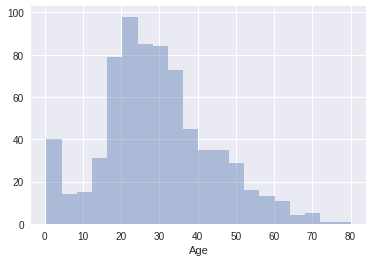

In [149]:
sns.distplot(train['Age'].dropna(),kde=False)

Note: Age variable seems to follow a bimodal distribution. I have removed null values for now. 

# Processing Data

In [0]:
# We can try to impute missing values of Age variable using other variables such as Pclass. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


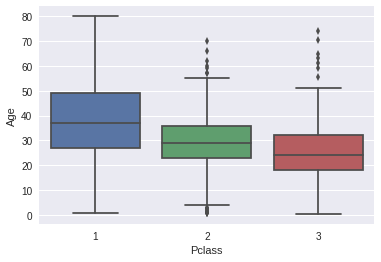

In [151]:
sns.boxplot(x='Pclass', y='Age', data=train)

Note: Passengers in class 1 and 2 are older than class 3. Therefore, we can use these average age values to impute missing values. 

In [152]:
train.groupby(['Pclass'], as_index=False).mean().groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [0]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  
  if pd.isnull(Age):
    
    if Pclass == 1:
      return 38.233
    elif Pclass == 2:
      return 29.877
    else:
      return 25.141
    
  else:
    return Age

In [0]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

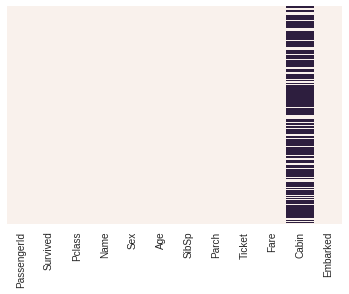

In [155]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False)

Note: Now we don't have any missing values in Age column. 

In [0]:
#Since there are too many missing values in the Cabin column, it's better to ignore that variable in our model. 

In [0]:
train.drop('Cabin', axis=1, inplace=True)

In [158]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
# Note: There are still 2 missing values in Embarked column.Since we won't lose a lot of information with just 2 values, I will simply drop those rows. 

In [0]:
train.dropna(inplace=True)

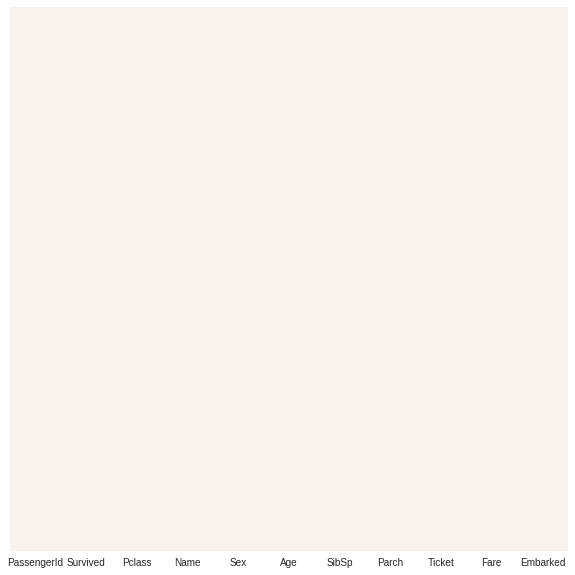

In [161]:
plt.subplots(figsize=(10,10))
sns.heatmap(train.isnull(),yticklabels=False, cbar=False)

No more missing values.

In [162]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [0]:
# Now I will convert the categorical features (Sex, Embarked, Pclass) to dummy variables. 

In [164]:
pd.get_dummies(train['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [0]:
# To avoid multicollinearity, I will drop female column

In [0]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [167]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [0]:
# Same thing for embarked column. Dropping C column

In [0]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [170]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [171]:
print(train['Embarked'].unique())

['S' 'C' 'Q']


In [0]:
#And finally I do the same for Pclass since it is still an ordinal variable

In [0]:
pclass = pd.get_dummies(train['Pclass'],drop_first=True)

In [174]:
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [175]:
print(train['Pclass'].unique())

[3 1 2]


In [0]:
# Now that I have converted mmy categorical and ordinal variables to dummy variables, I can concatenate them in my train dataset. 

In [0]:
train = pd.concat([train, sex, embark, pclass], axis=1)

In [178]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0


In [0]:
# Now I have 5 new columns in the end of my dataset. 

In [0]:
# I will drop the columns that I won't be using in my model. 

In [0]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [182]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [0]:
train.drop('PassengerId', axis=1, inplace=True)

In [184]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


# Defining the model in Keras

In [185]:
X = train.drop(['Survived'], axis=1).values
X.shape

(889, 10)

In [187]:
y = train[0:889]['Survived'].values
y.shape

(889,)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.train import AdamOptimizer

In [0]:
#Initialising the NN
model = Sequential()

In [194]:
model.add(Dense(10, input_shape=(10,), activation='relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer=AdamOptimizer(0.01), loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [195]:
# Train the NN
h = model.fit(X,y, epochs=200, validation_split=0.33, batch_size=32)

Train on 595 samples, validate on 294 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
595/595 [==============================] - 0s 751us/sample - loss: 0.8778 - acc: 0.6050 - val_loss: 0.6246 - val_acc: 0.7143
Epoch 2/200
595/595 [==============================] - 0s 69us/sample - loss: 0.7056 - acc: 0.6874 - val_loss: 0.6531 - val_acc: 0.6667
Epoch 3/200
595/595 [==============================] - 0s 68us/sample - loss: 0.6625 - acc: 0.6403 - val_loss: 0.6042 - val_acc: 0.7211
Epoch 4/200
595/595 [==============================] - 0s 65us/sample - loss: 0.6446 - acc: 0.6639 - val_loss: 0.5892 - val_acc: 0.7075
Epoch 5/200
595/595 [==============================] - 0s 66us/sample - loss: 0.6349 - acc: 0.6689 - val_loss: 0.5788 - val_acc: 0.7075
Epoch 6/200
595/595 [==============================] - 0s 69us/sample - loss: 0.6278 - acc: 0.6639 - val_loss: 0.5710 - val_acc: 0.7041
Epoch 7/200
595/595 [==============================] - 0s 66us/sample - loss: 0.6196 - ac

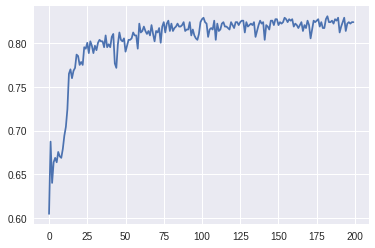

In [198]:
plt.plot(h.history['acc'])

Note: Accuracy is peaking at 0.8235